# Etude sérologique sur la covid-19

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Lien du jeu de données proposé par Machine Learnia

In [124]:
url = 'https://raw.githubusercontent.com/MachineLearnia/Python-Machine-Learning/master/Dataset/dataset.csv'
data = pd.read_csv(url, index_col=2, encoding = "ISO-8859-1")

In [125]:
data.head()

,Patient ID,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
SARS-Cov-2 exam result,,,,,,,,,,,,,,,,,,,,,
negative,44477f75e8169d2,13,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negative,126e9dd13932f68,17,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negative,a46b4402a0e5696,8,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negative,f7d619a94f97c45,5,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negative,d9e41465789c2b5,15,0,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Remarques:
    * l'étude se focalise sur plusieurs paramètres:
        * Le taux d'hemoglobine(oxygénation).
        * Globules rouge.
        * Le PH...etc

In [127]:
data = data[["Hematocrit","Hemoglobin","Platelets","Red blood Cells","Lymphocytes","Leukocytes","Basophils","Mean corpuscular hemoglobin (MCH)","Eosinophils","Mean corpuscular volume (MCV)","Monocytes","Red blood cell distribution width (RDW)"]]

In [128]:
# Drop les NaN
data.dropna(inplace=True)

<ipython-input-128-227efd05ae77>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [129]:
# Index Age, after droping NaN
data.head()

,Hematocrit,Hemoglobin,Platelets,Red blood Cells,Lymphocytes,Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW)
SARS-Cov-2 exam result,,,,,,,,,,,,
negative,0.236515,-0.022340,-0.517413,0.102004,0.318366,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073
negative,-1.571682,-0.774212,1.429667,-0.850035,-0.005738,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899
negative,-0.747693,-0.586244,-0.429480,-1.361315,-1.114514,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355
negative,0.991838,0.792188,0.072992,0.542763,0.045436,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035
negative,0.190738,-0.147652,-0.668155,-0.127191,0.002791,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318


## Partie ML

In [130]:
# Calcule de la correlation
corr = data.corr()
corr

,Hematocrit,Hemoglobin,Platelets,Red blood Cells,Lymphocytes,Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW)
Hematocrit,1.000000,0.968511,-0.081295,0.874511,0.003200,-0.090332,0.128414,0.073166,0.029054,0.022976,0.082361,-0.263968
Hemoglobin,0.968511,1.000000,-0.118631,0.843625,-0.002315,-0.103005,0.114995,0.182260,0.017477,0.024244,0.094586,-0.341284
Platelets,-0.081295,-0.118631,1.000000,-0.056464,0.088152,0.444533,-0.023668,-0.096070,0.171520,-0.028662,-0.200660,-0.011008
Red blood Cells,0.874511,0.843625,-0.056464,1.000000,-0.011714,-0.035612,0.081132,-0.365702,-0.003216,-0.457660,0.045172,-0.140251
Lymphocytes,0.003200,-0.002315,0.088152,-0.011714,1.000000,-0.330178,0.237710,0.021037,0.201753,0.032690,0.065313,-0.082783
Leukocytes,-0.090332,-0.103005,0.444533,-0.035612,-0.330178,1.000000,-0.305564,-0.126858,-0.092748,-0.104918,-0.294731,0.129412
Basophils,0.128414,0.114995,-0.023668,0.081132,0.237710,-0.305564,1.000000,0.059592,0.333963,0.080700,0.098610,0.040837
Mean corpuscular hemoglobin (MCH),0.073166,0.182260,-0.096070,-0.365702,0.021037,-0.126858,0.059592,1.000000,0.025981,0.894037,0.092752,-0.296583
Eosinophils,0.029054,0.017477,0.171520,-0.003216,0.201753,-0.092748,0.333963,0.025981,1.000000,0.050275,0.009467,-0.005928
Mean corpuscular volume (MCV),0.022976,0.024244,-0.028662,-0.457660,0.032690,-0.104918,0.080700,0.894037,0.050275,1.000000,0.066071,-0.147346


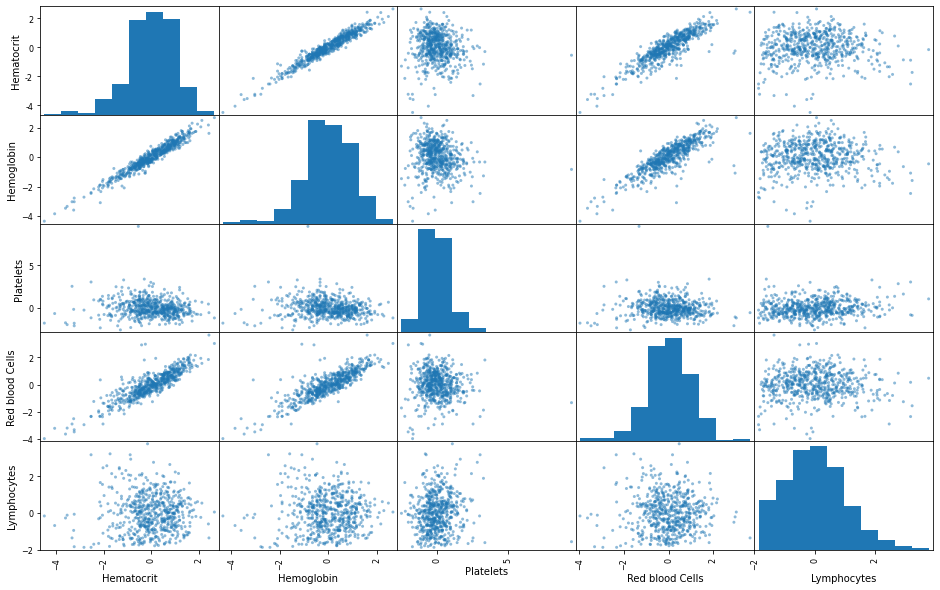

In [131]:
# Scatter matrix en se focalisant sur la relation entre 5 liquides physiologiques.
from pandas.plotting import scatter_matrix
data_for_corr = data[['Hematocrit', 'Hemoglobin', 'Platelets', 'Red blood Cells', 'Lymphocytes']]
scatter_mat = scatter_matrix(data_for_corr, figsize=(16,10))

<AxesSubplot:>

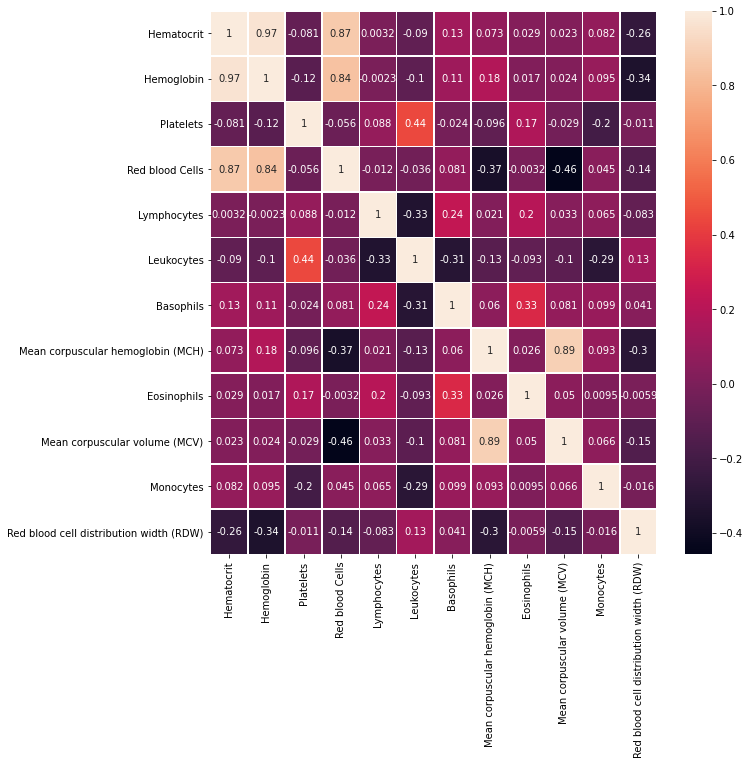

In [132]:
# La matrice de correlation entière.
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.5, ax=ax)

In [ ]:
data.boxplot(rot=25)

- On voit bien que les moustaches sont toutes au même échelle(pas besoin de scaler les features)

### Calcul du n_cluster

In [133]:
data

,Hematocrit,Hemoglobin,Platelets,Red blood Cells,Lymphocytes,Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW)
SARS-Cov-2 exam result,,,,,,,,,,,,
negative,0.236515,-0.022340,-0.517413,0.102004,0.318366,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073
negative,-1.571682,-0.774212,1.429667,-0.850035,-0.005738,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899
negative,-0.747693,-0.586244,-0.429480,-1.361315,-1.114514,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355
negative,0.991838,0.792188,0.072992,0.542763,0.045436,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035
negative,0.190738,-0.147652,-0.668155,-0.127191,0.002791,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318
...,...,...,...,...,...,...,...,...,...,...,...,...
negative,0.190738,0.165628,-0.102873,0.384090,-1.583611,-0.328365,-0.834685,-0.449085,0.892207,-0.474754,1.066653,0.347948
negative,-0.289922,-0.523588,0.663397,0.754327,-1.532437,1.569499,0.081693,-2.174047,-0.540532,-1.976971,1.670707,0.967144
negative,0.717175,1.105468,-0.492289,0.613284,0.002791,-0.550988,-0.223767,0.700891,-0.709090,0.005955,0.909074,-1.155812


*** For n_clusters = 1, inertia is 7200.423425257547 ***

*** For n_clusters = 2, inertia is 6113.469534911773 ***

*** For n_clusters = 3, inertia is 5455.328151229355 ***

*** For n_clusters = 4, inertia is 5065.623096932156 ***



Text(0.5, 1.0, 'Optimal nb of clusters')

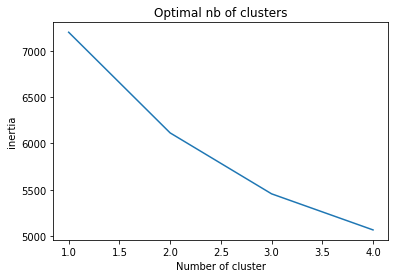

In [136]:

from sklearn import cluster
scores = {}
for k in range(1,5):
    km = cluster.KMeans(n_clusters=k, random_state=42)
    km.fit(data)
    scores[k] = km.inertia_
    print(f'*** For n_clusters = {k}, inertia is {km.inertia_} ***\n')
plt.figure()
plt.plot(list(scores.keys()), list(scores.values()))
plt.xlabel("Number of cluster")
plt.ylabel("inertia")
plt.title("Optimal nb of clusters")

In [158]:
model = KMeans(n_clusters=2, random_state=42)
model.fit(data)
model.labels_

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,

In [159]:
data['covid_result'] = model.labels_
data

,Hematocrit,Hemoglobin,Platelets,Red blood Cells,Lymphocytes,Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),covid_result
SARS-Cov-2 exam result,,,,,,,,,,,,,
negative,0.236515,-0.022340,-0.517413,0.102004,0.318366,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,0
negative,-1.571682,-0.774212,1.429667,-0.850035,-0.005738,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899,1
negative,-0.747693,-0.586244,-0.429480,-1.361315,-1.114514,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355,1
negative,0.991838,0.792188,0.072992,0.542763,0.045436,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035,0
negative,0.190738,-0.147652,-0.668155,-0.127191,0.002791,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
negative,0.190738,0.165628,-0.102873,0.384090,-1.583611,-0.328365,-0.834685,-0.449085,0.892207,-0.474754,1.066653,0.347948,0
negative,-0.289922,-0.523588,0.663397,0.754327,-1.532437,1.569499,0.081693,-2.174047,-0.540532,-1.976971,1.670707,0.967144,1
negative,0.717175,1.105468,-0.492289,0.613284,0.002791,-0.550988,-0.223767,0.700891,-0.709090,0.005955,0.909074,-1.155812,0


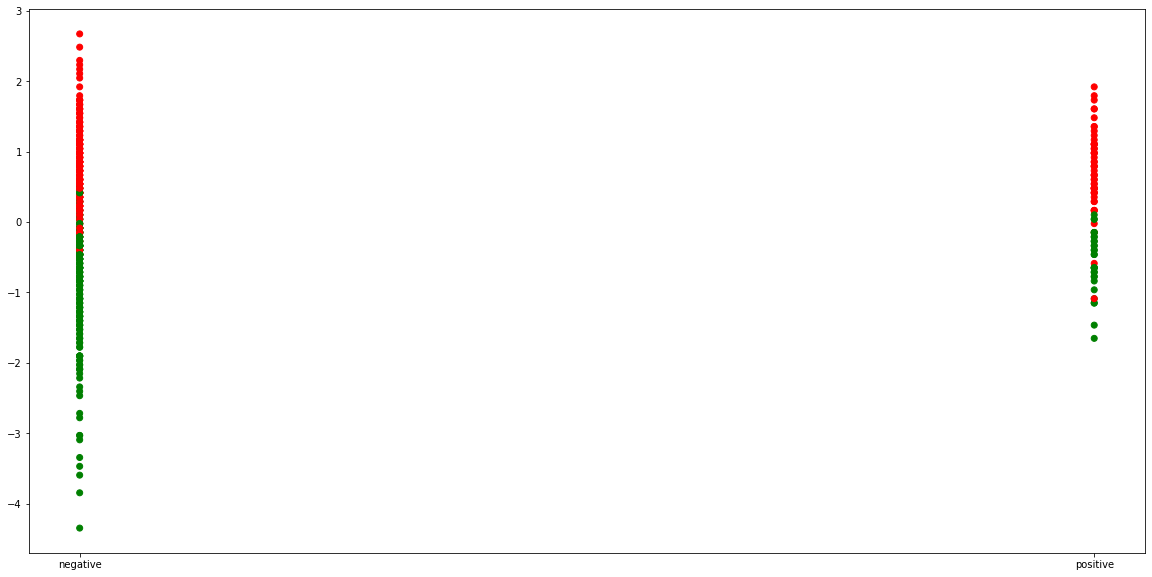

In [170]:
# plotting clusters
colormap=np.array(['Red','green'])
plt.figure(figsize=(20,10))
plt.scatter(data.index, data.Hemoglobin,c=colormap[model.labels_])


In [165]:
pca = PCA(n_components=2, random_state=42)
pca = pca.fit_transform(data)
pca = pd.DataFrame(data=pca, columns=["pc1","pc2"])
pca

,pc1,pc2
0,-0.529392,-0.381610
1,1.723535,0.509798
2,1.195409,-2.832242
3,-1.157047,-0.166465
4,-0.357203,-0.984182
...,...,...
596,-0.496136,0.710310
597,0.408204,3.392711
598,-1.813541,-0.825453
599,4.732091,-3.311559


In [172]:
model = KMeans(n_clusters=2, random_state=42 )
model.fit(pca)

KMeans(n_clusters=2, random_state=42)

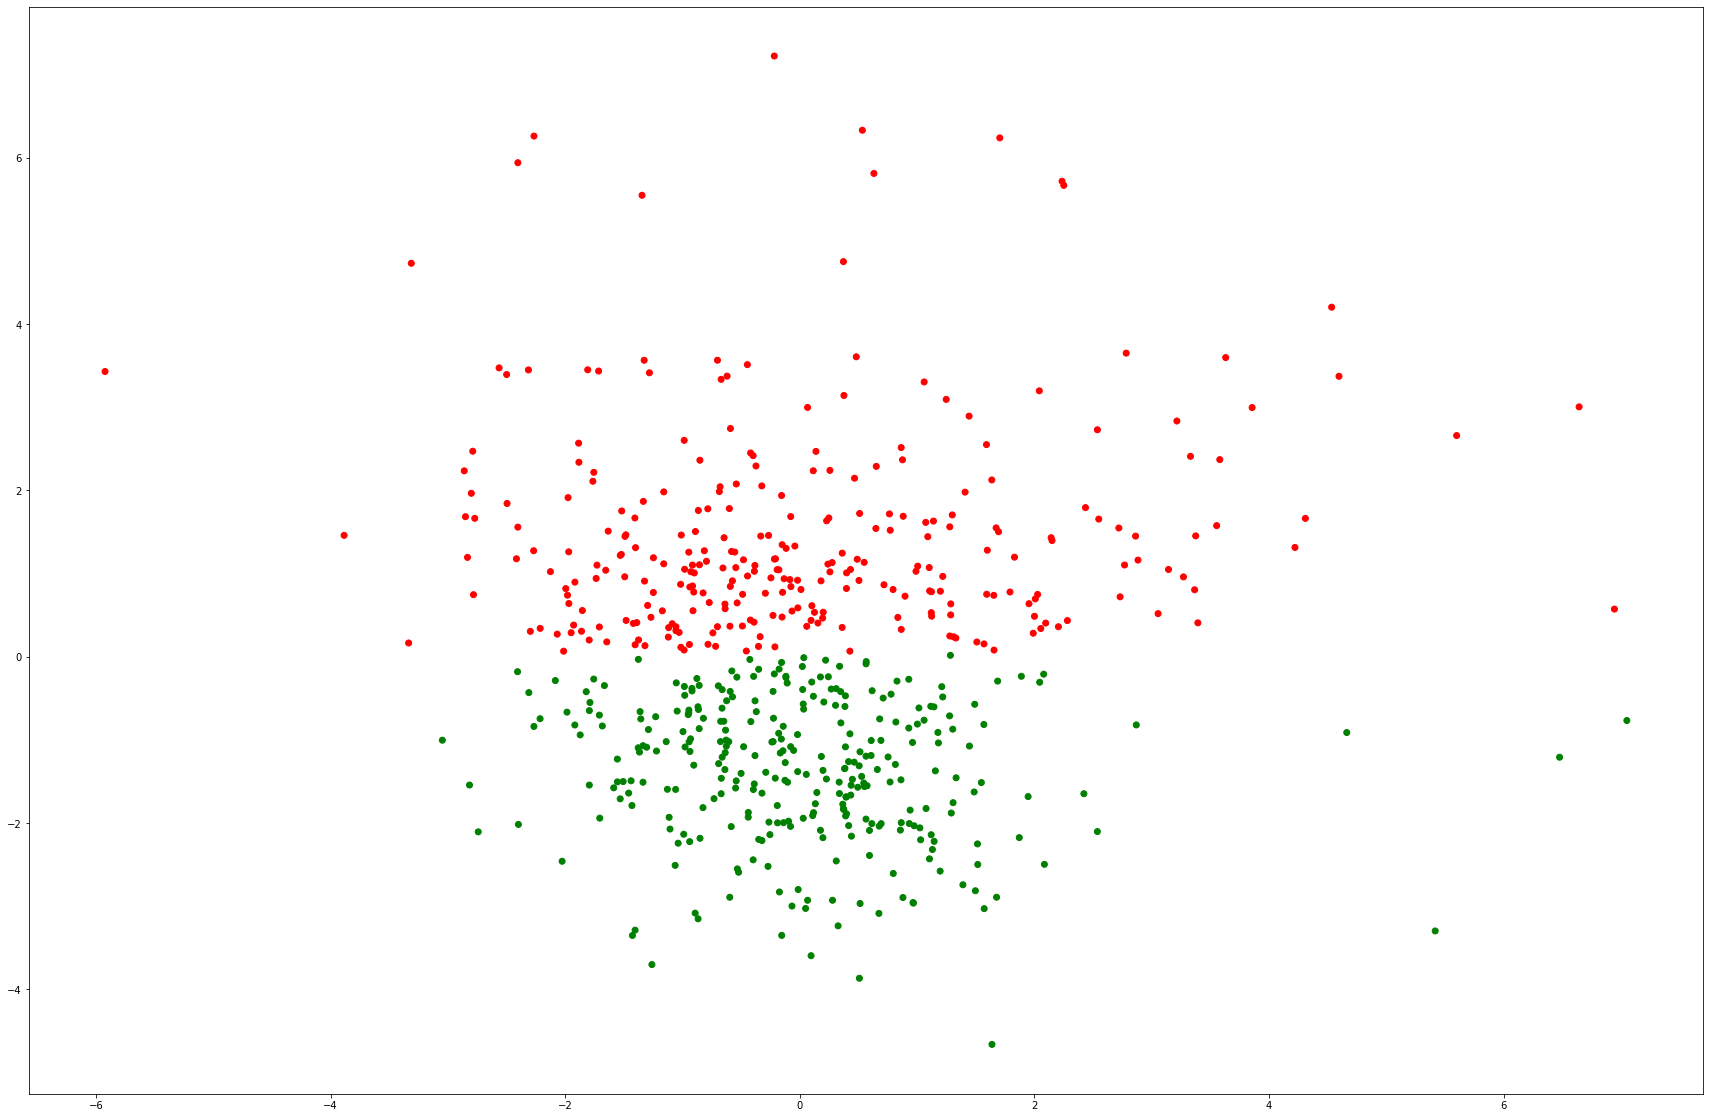

In [171]:
colormap=np.array(['green','Red'])
plt.figure(figsize=(30,20))
plt.scatter(pca.pc2,pca.pc1,c=colormap[model.labels_])